In [3]:
import glob
import librosa
import librosa.display as ipd

import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

import warnings
warnings.filterwarnings("ignore")

In [49]:
# Wave Plot for audio file in dataset
data_path = '../Data/'
cv_filenames = ['cv_1.wav', 'cv_2.wav', 'cv_3.wav', 'cv_4.wav']
wake_word_filenames = ['google.wav', 'siri.wav', 'alexa.wav']
spotify = 'spotify.wav'

### Wave Plot

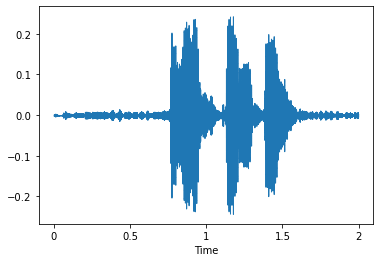

<Figure size 2160x2160 with 0 Axes>

In [90]:
spotify_data, spotify_sr = librosa.load(data_path + spotify)
librosa.display.waveshow(spotify_data, sr = spotify_sr, label = 'spotify')
plt.figure(figsize = (30, 30))
plt.show()

def plot_cv():
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    fig, axs = plt.subplots(4, 1, figsize = (30, 30))
    for i, cv in enumerate(cv_filenames):
        plt.subplot(4, 1, i + 1)
        data, sample_rate = librosa.load(data_path + cv)
        librosa.display.waveshow(data, sr = sample_rate, label = cv.split('.')[0])
        librosa.display.waveshow(spotify_data, sr = spotify_sr, label = 'spotify')

        plt.legend()
    
    plt.show()

def plot_wake_word():
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    fig, axs = plt.subplots(4, 1, figsize = (30, 30))
    for i, wake_word in enumerate(wake_word_filenames):
        plt.subplot(4, 1, i + 1)
        data, sample_rate = librosa.load(data_path + wake_word)
        librosa.display.waveshow(data, sr = sample_rate, label = wake_word.split('.')[0])
        librosa.display.waveshow(spotify_data, sr = spotify_sr, label = 'spotify')

        plt.legend()
    
    plt.show()

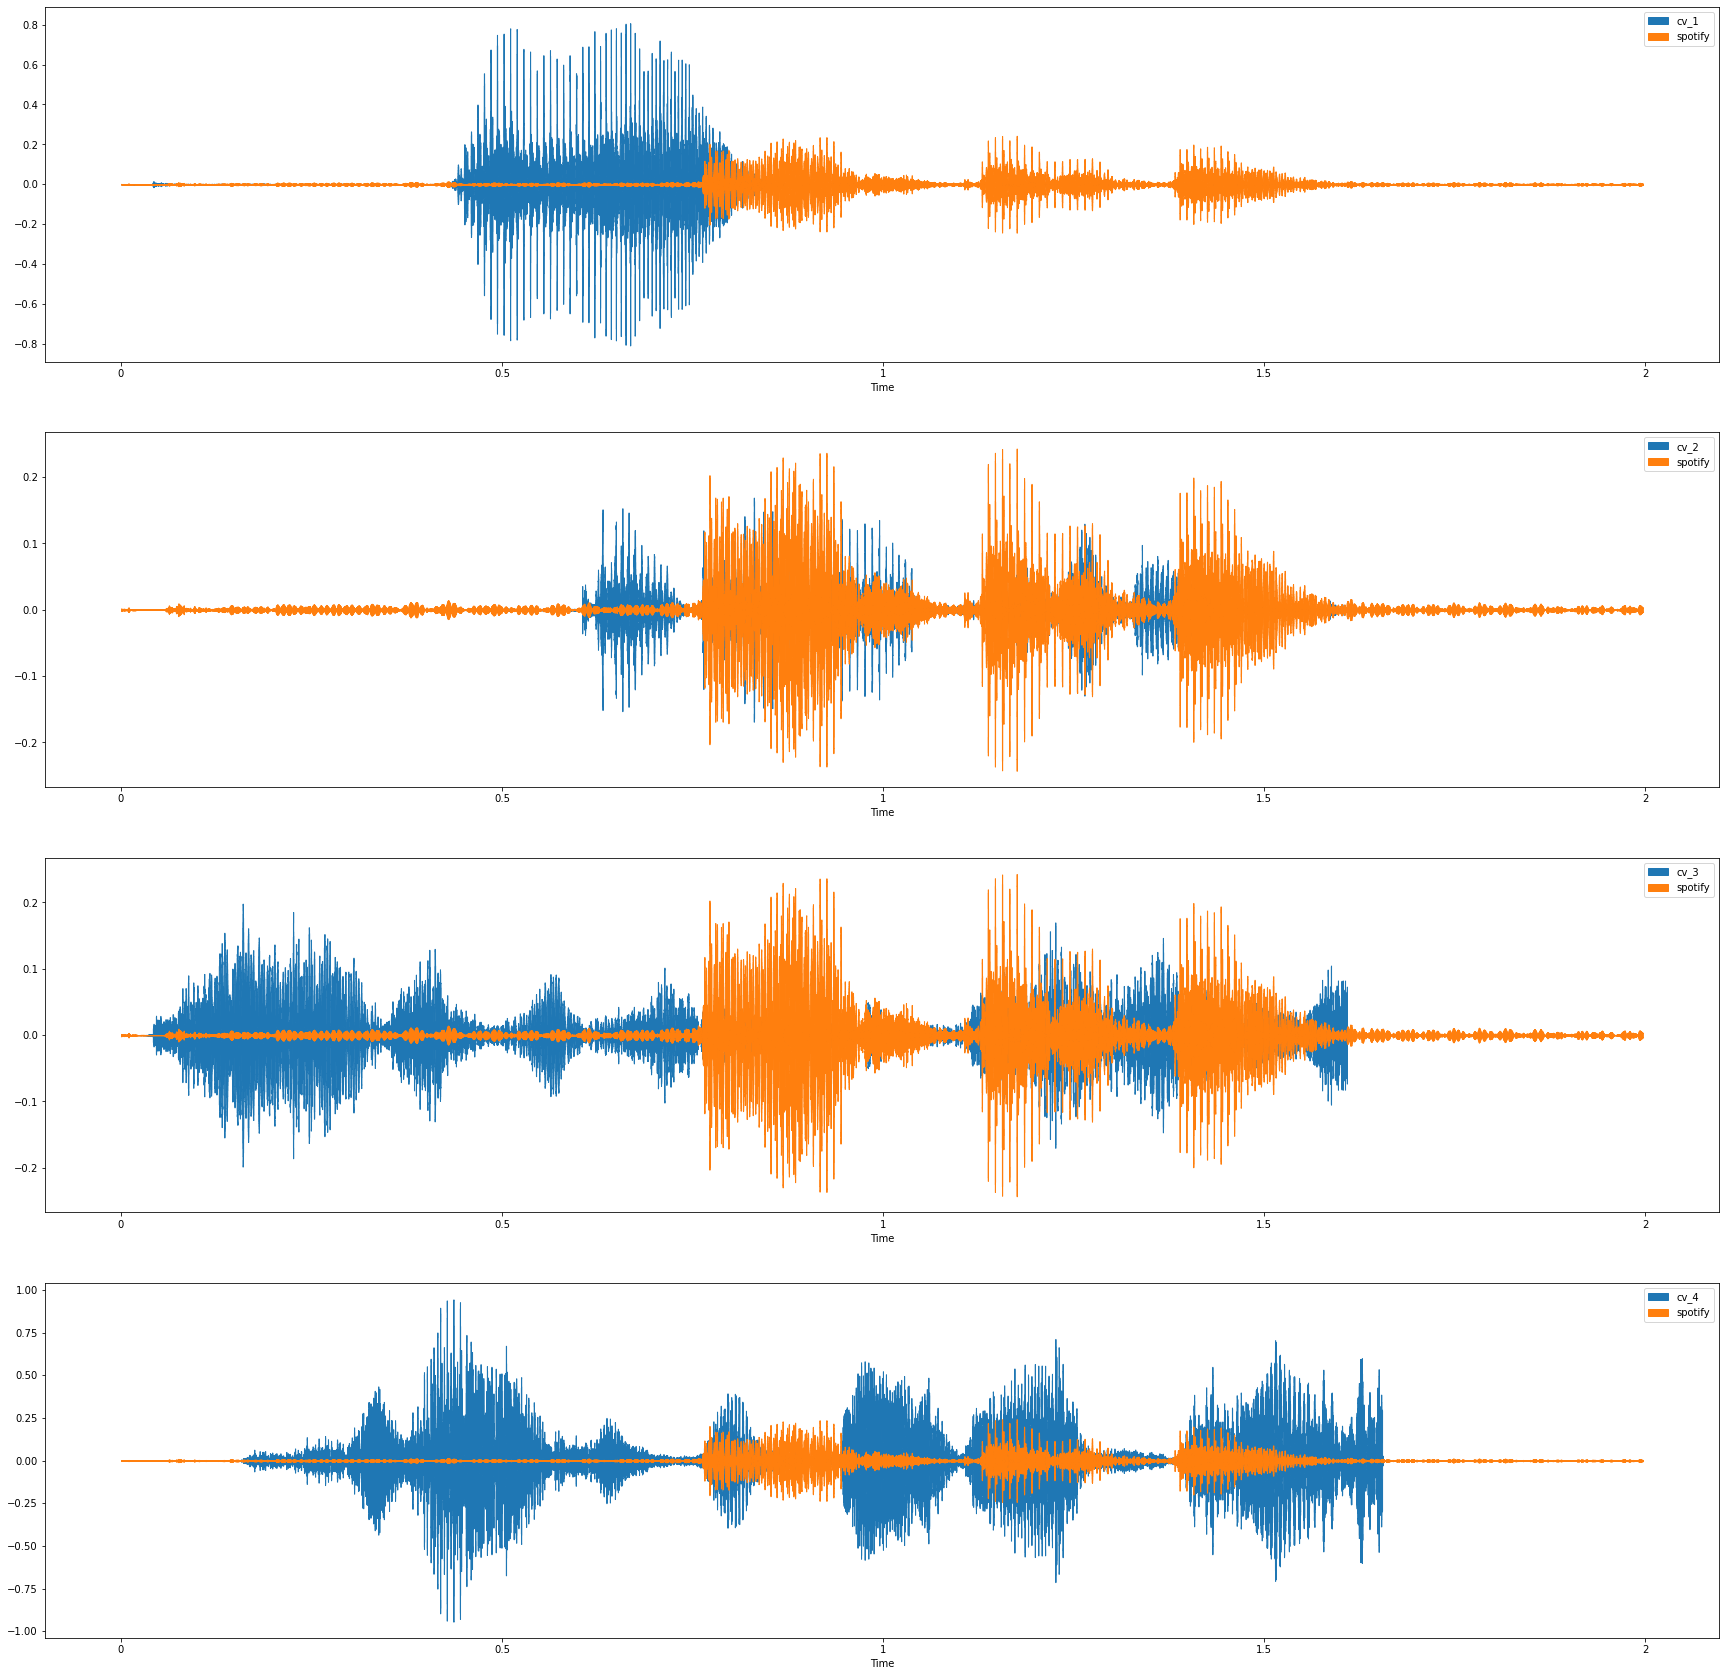

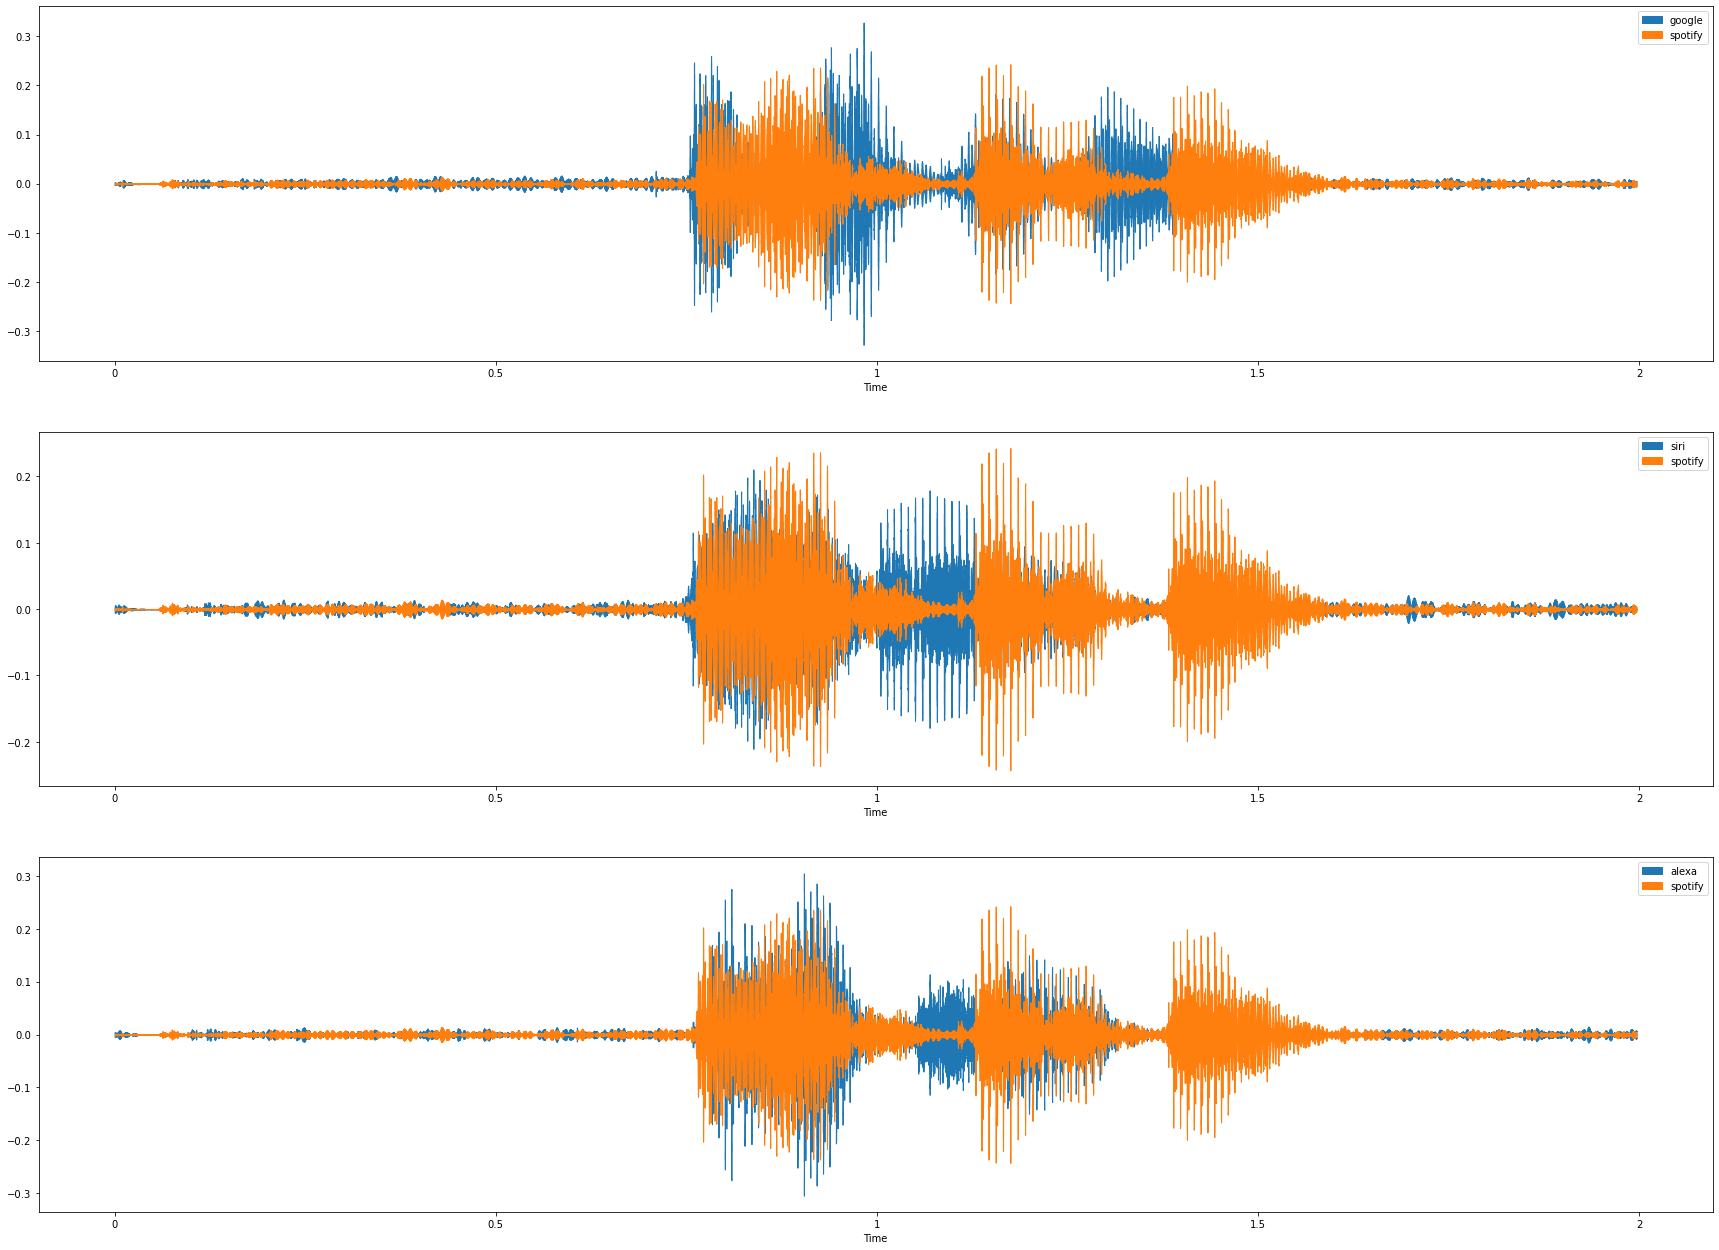

In [89]:
plot_cv() 
plot_wake_word()

In [169]:
def specshow_cv(y_axis = 'linear'):
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    spotify_db = librosa.amplitude_to_db(np.abs(librosa.stft(spotify_data)), ref = np.max)
    
    for i, cv in enumerate(cv_filenames):
        fig, axs = plt.subplots(figsize = (15, 5))
        if i == 0: fig.suptitle('Common voice')
        
        plt.subplot(1, 2, 1)
        plt.title(cv.split('.')[0])
        data, sample_rate = librosa.load(data_path + cv)
        s_db = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref = np.max)
        librosa.display.specshow(s_db, x_axis = 'time', y_axis = y_axis)
        
        plt.subplot(1, 2, 2)
        plt.title('spotify')
        librosa.display.specshow(spotify_db, x_axis = 'time', y_axis = y_axis)
        fig.colorbar(img, ax = fig.get_axes(), format = "%+2.f dB")
    plt.show()
    
        
def specshow_wake_word(y_axis = 'linear'):
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    spotify_db = librosa.amplitude_to_db(np.abs(librosa.stft(spotify_data)), ref = np.max)
    
    for i, wake_word in enumerate(wake_word_filenames):
        fig, axs = plt.subplots(figsize = (15, 5))
        if i == 0: fig.suptitle('Wake Words')
        
        plt.subplot(1, 2, 1)
        plt.title(wake_word.split('.')[0])
        data, sample_rate = librosa.load(data_path + wake_word)
        s_db = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref = np.max)
        librosa.display.specshow(s_db, x_axis = 'time', y_axis = y_axis)
        
        plt.subplot(1, 2, 2)
        plt.title('spotify')
        librosa.display.specshow(spotify_db, x_axis = 'time', y_axis = y_axis)
        fig.colorbar(img, ax = fig.get_axes(), format = "%+2.f dB")
        plt.show()

# Linear Scale Spectrogram

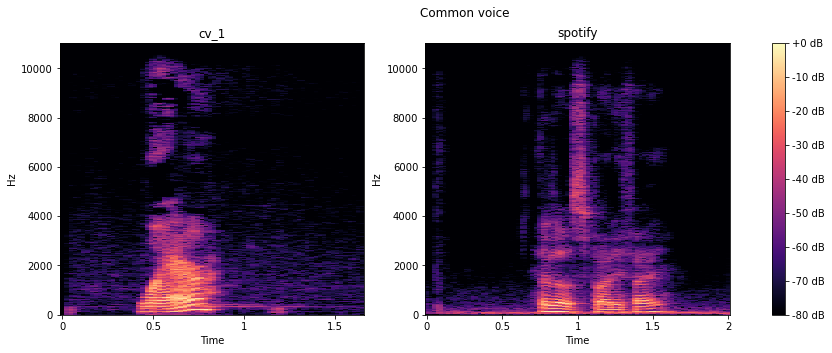

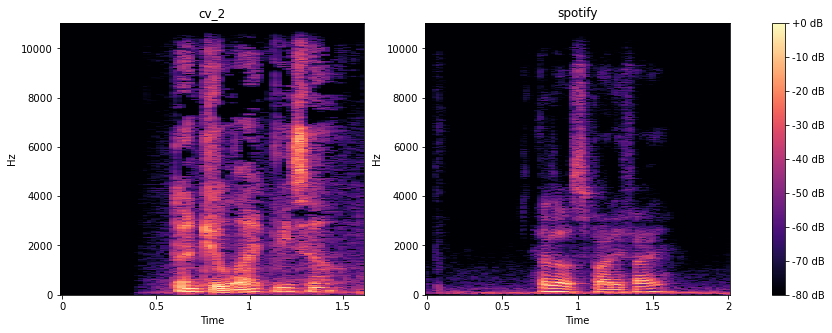

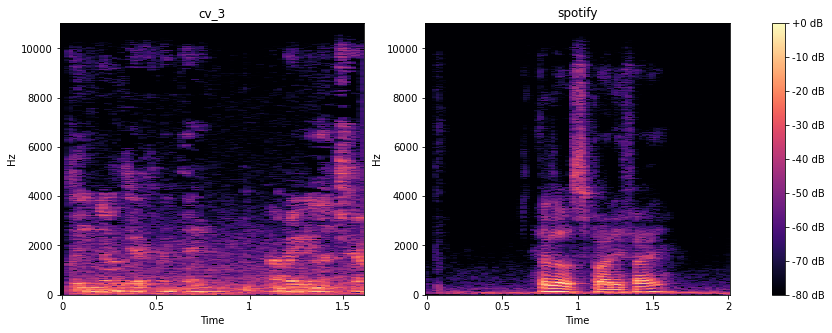

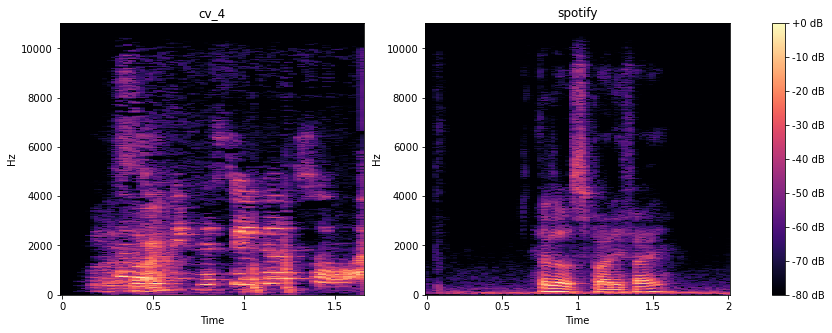

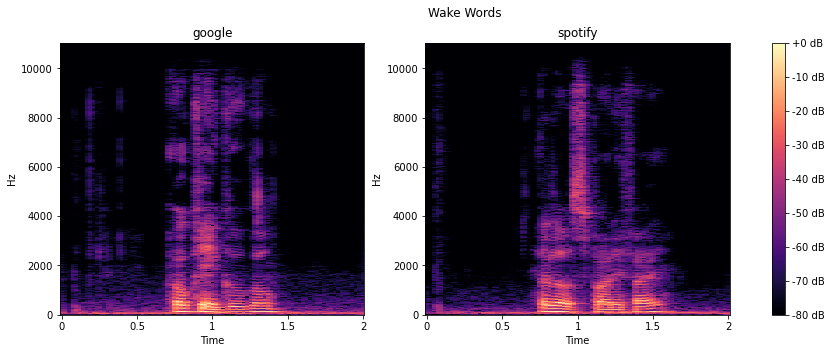

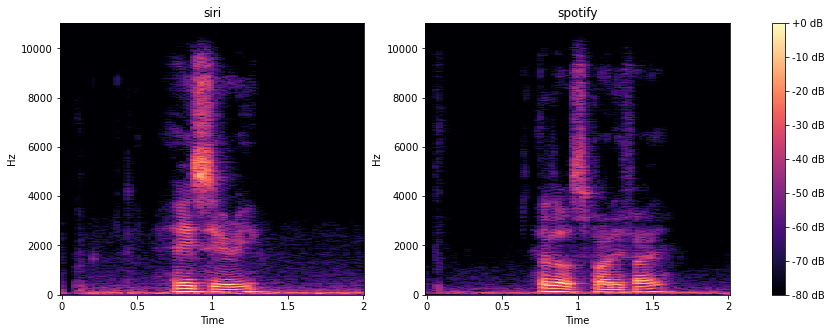

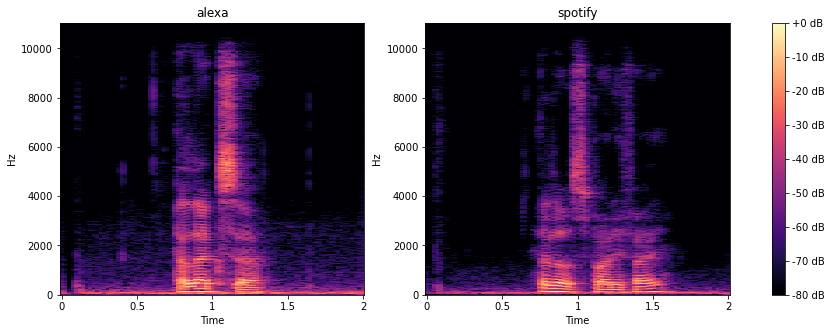

In [170]:
specshow_cv(y_axis = 'linear')
specshow_wake_word(y_axis = 'linear')

# Log Scale Spectrogram


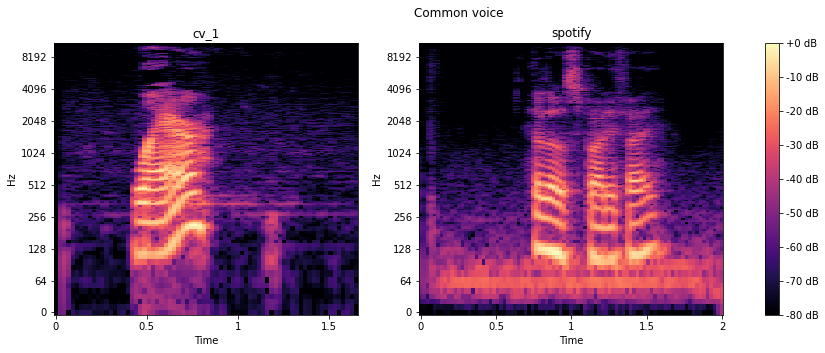

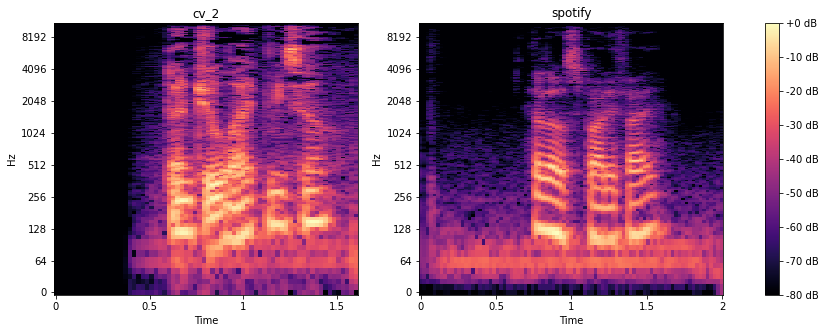

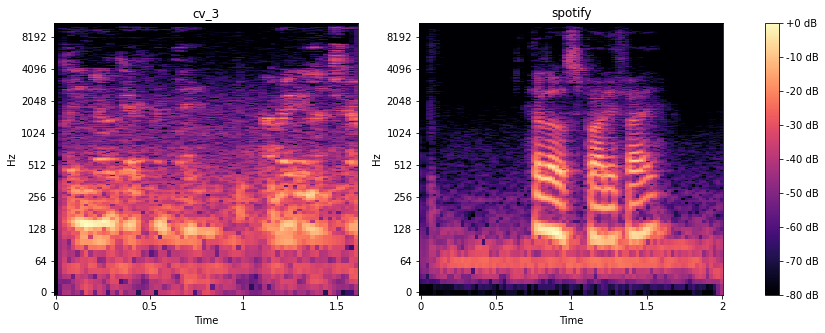

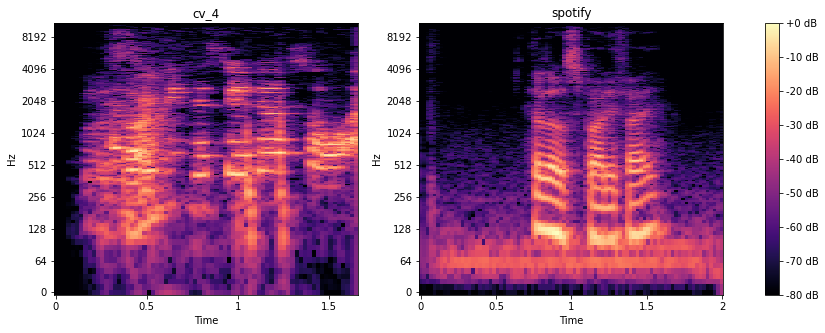

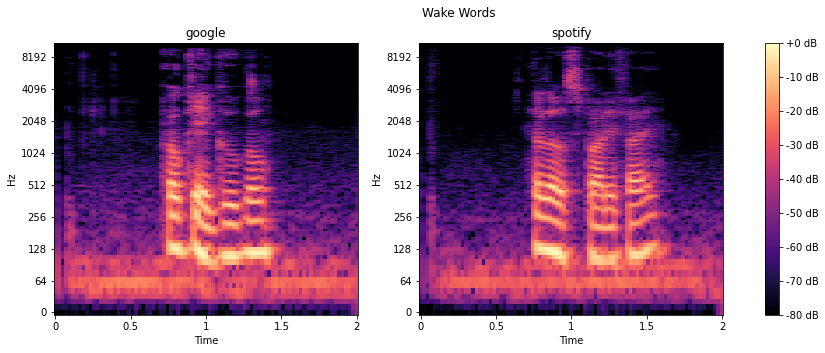

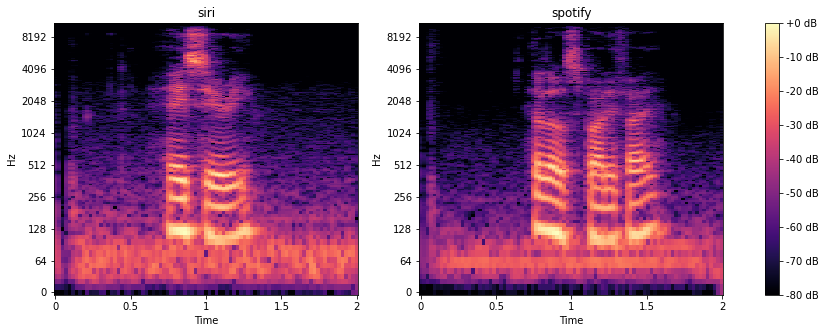

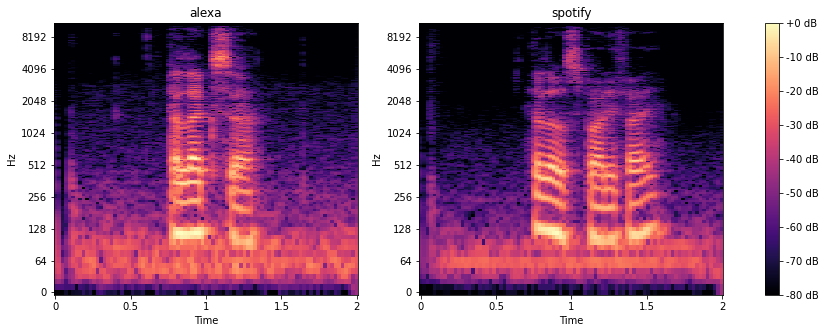

In [172]:
specshow_cv(y_axis = 'log')
specshow_wake_word(y_axis = 'log')

# MEL Scale Spectrogram for first ten audio files in dataset


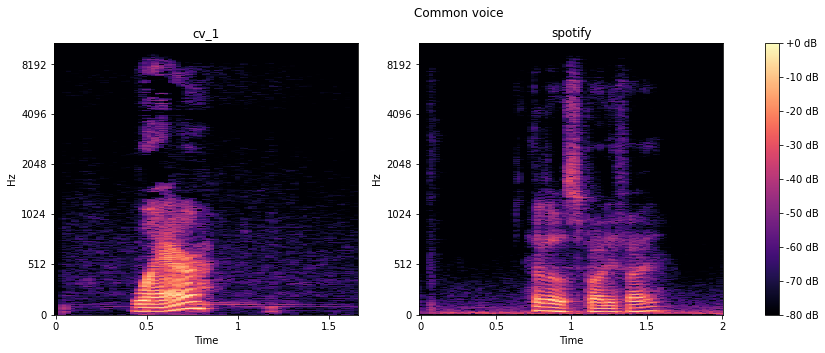

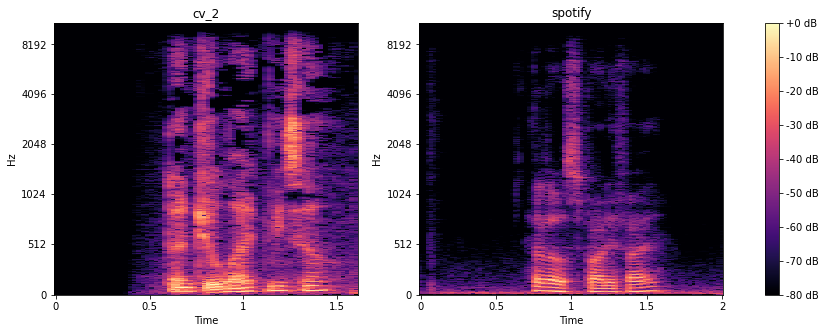

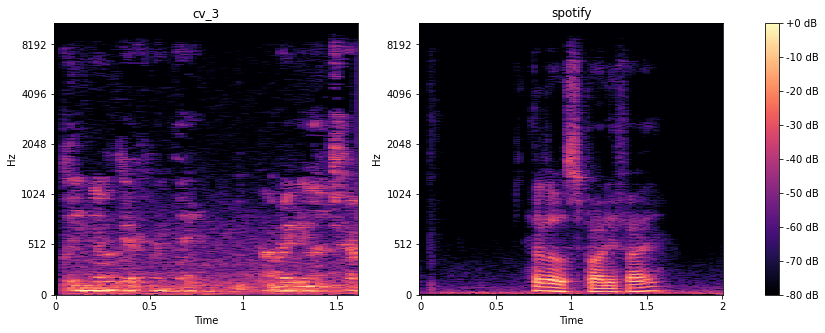

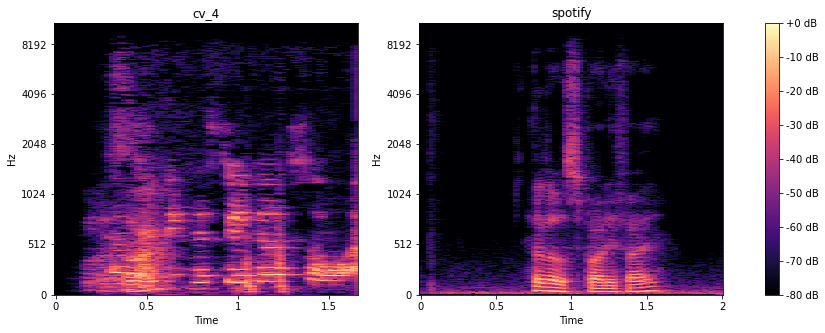

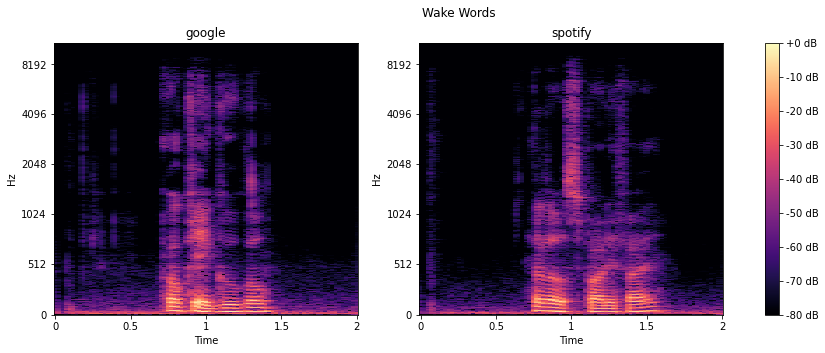

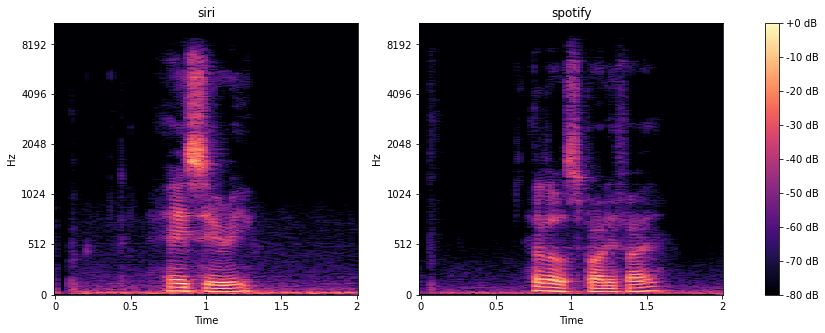

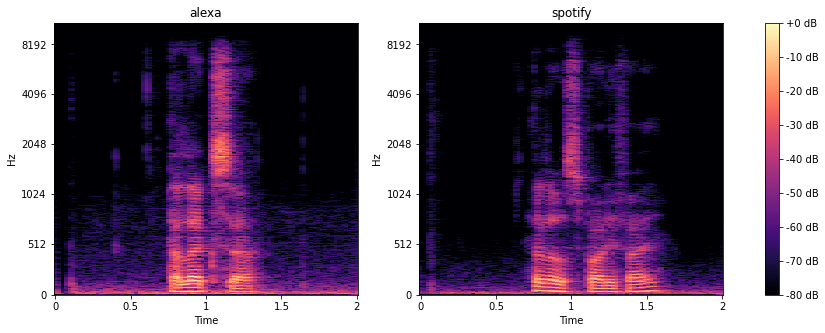

In [174]:
specshow_cv(y_axis = 'mel')
specshow_wake_word(y_axis = 'mel')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

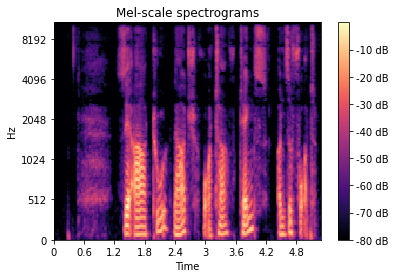

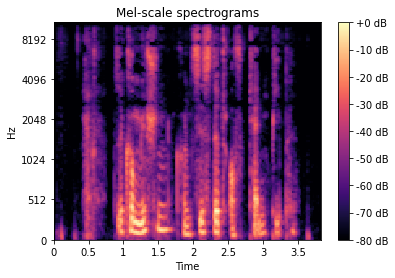

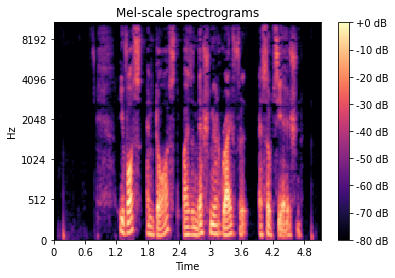

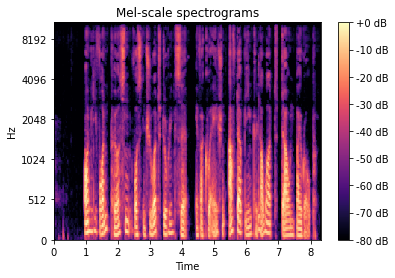

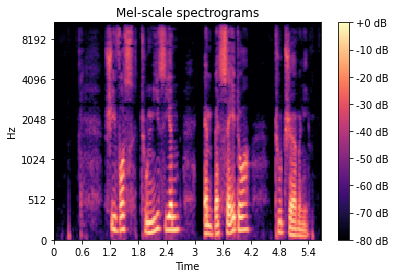

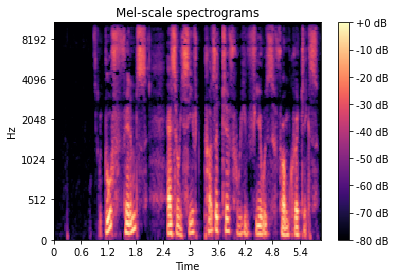

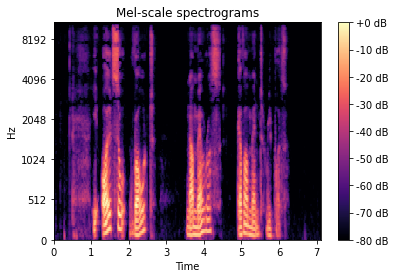

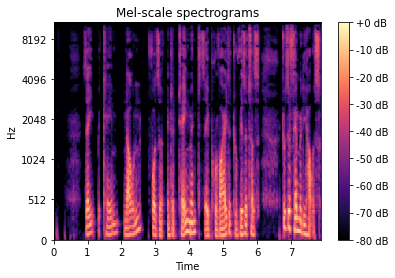

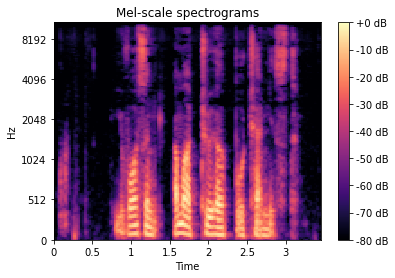

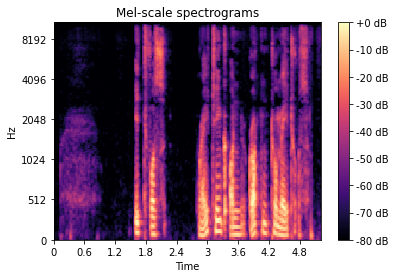

In [17]:
import os

directoryName = 'cv-corpus-11-en'
for filenm in os.listdir('cv-corpus-11-en'):
    f = os.path.join(directoryName, filenm)
    data,sample_rate=librosa.load(f)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

    fig, ax = plt.subplots()
    m = librosa.feature.melspectrogram(data, sample_rate)
    m_db = librosa.power_to_db(m, ref=np.max)
    img = librosa.display.specshow(m_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel-scale spectrograms')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

# MFCCs plots for first ten audio files

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


cv-corpus-11-en/common_voice_en_33152278.mp3


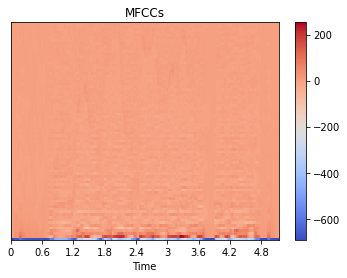

In [23]:
filename='cv-corpus-11-en/common_voice_en_33152278.mp3'
data,sample_rate=librosa.load(filename)
print(filename)

fig, ax = plt.subplots()
mfccs = librosa.feature.mfcc(data, n_mfcc=80)
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
ax.set(title='MFCCs')
fig.colorbar(img, ax=ax)

In [178]:
def mfccs_cv():
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    spotify_mfcc = librosa.feature.mfcc(spotify_data, n_mfcc = 80)
    
    for i, cv in enumerate(cv_filenames):
        fig, axs = plt.subplots(figsize = (15, 5))
        if i == 0: fig.suptitle('Common voice')
        
        plt.subplot(1, 2, 1)
        plt.title(cv.split('.')[0])
        data, sample_rate = librosa.load(data_path + cv)
        mfccs = librosa.feature.mfcc(data, n_mfcc = 80)
        librosa.display.specshow(mfccs, x_axis = 'time')
        
        plt.subplot(1, 2, 2)
        plt.title('spotify')
        librosa.display.specshow(spotify_mfcc, x_axis = 'time')
        fig.colorbar(img, ax = fig.get_axes(), format = "%+2.f dB")
    plt.show()
    
        
def mfccs_wake_word():
    spotify_data, spotify_sr = librosa.load(data_path + spotify)
    spotify_mfcc = librosa.feature.mfcc(spotify_data, n_mfcc = 80)
    
    for i, wake_word in enumerate(wake_word_filenames):
        fig, axs = plt.subplots(figsize = (15, 5))
        if i == 0: fig.suptitle('Wake Words')
        
        plt.subplot(1, 2, 1)
        plt.title(wake_word.split('.')[0])
        data, sample_rate = librosa.load(data_path + wake_word)
        mfccs = librosa.feature.mfcc(data, n_mfcc = 80)
        librosa.display.specshow(mfccs, x_axis = 'time')
        
        plt.subplot(1, 2, 2)
        plt.title('spotify')
        librosa.display.specshow(spotify_mfcc, x_axis = 'time')
        fig.colorbar(img, ax = fig.get_axes(), format = "%+2.f dB")
        plt.show()

/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:3: FutureWarning: Pass y=[ 0.00055999  0.00153019  0.00155375 ... -0.00299445 -0.00293961
 -0.00311122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spotify_mfcc = librosa.feature.mfcc(spotify_data, n_mfcc = 80)
/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:12: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.9347372e-05
 -4.1643416e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, n_mfcc = 80)
/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:12: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, n_mfcc = 80)
/var/folders/p7/37gvwfj126vbz0f_w

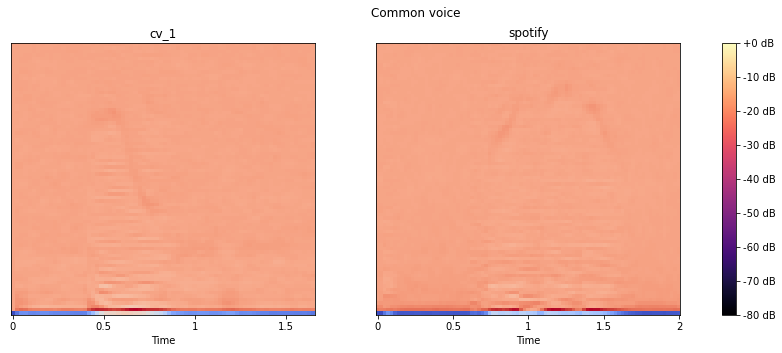

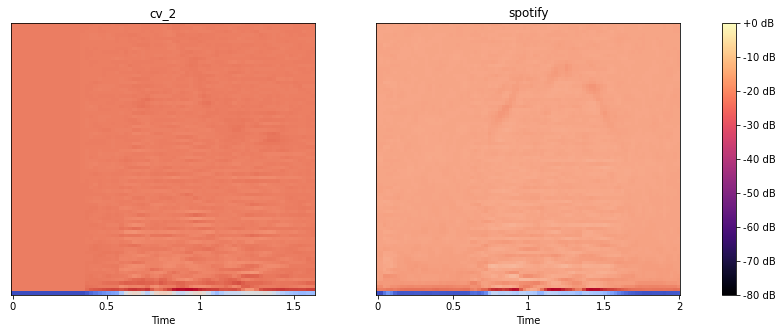

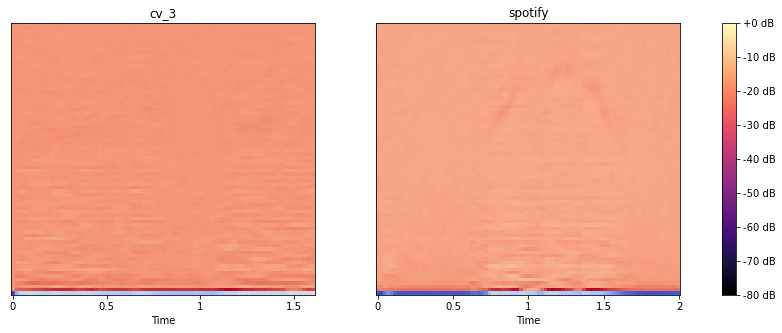

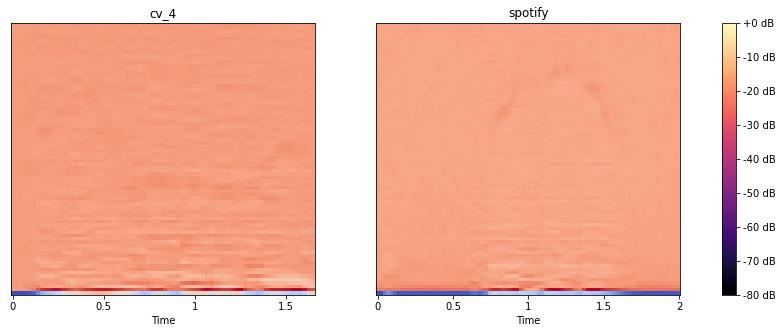

/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:24: FutureWarning: Pass y=[ 0.00055999  0.00153019  0.00155375 ... -0.00299445 -0.00293961
 -0.00311122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spotify_mfcc = librosa.feature.mfcc(spotify_data, n_mfcc = 80)
/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:33: FutureWarning: Pass y=[0.00106476 0.00278579 0.00272648 ... 0.00497671 0.004909   0.00515014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, n_mfcc = 80)


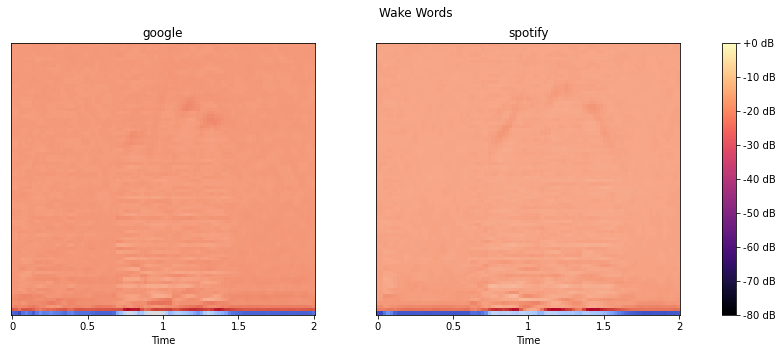

/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:33: FutureWarning: Pass y=[-0.00156679 -0.00425175 -0.00420384 ... -0.00089611 -0.0008414
 -0.00087886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, n_mfcc = 80)


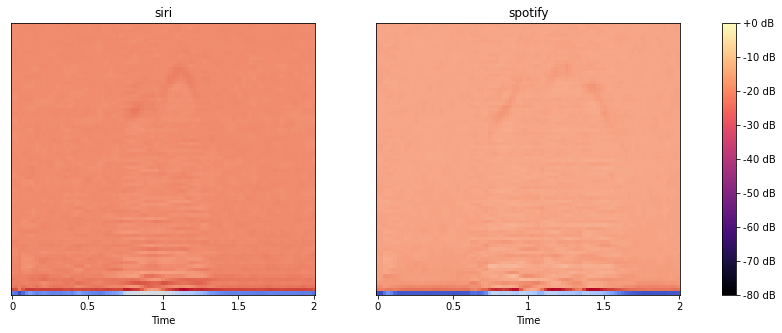

/var/folders/p7/37gvwfj126vbz0f_w_nr2c880000gn/T/ipykernel_50308/228303025.py:33: FutureWarning: Pass y=[-0.00147881 -0.0041244  -0.0041049  ...  0.00693881  0.00683835
  0.00722483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, n_mfcc = 80)


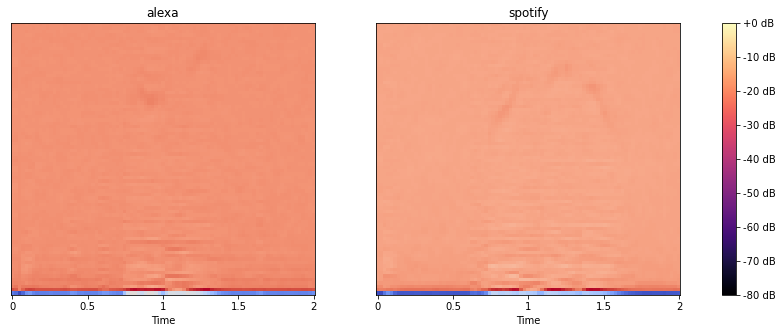

In [179]:
mfccs_cv()
mfccs_wake_word()